<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ai_Assignment6/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS203 Lab 6

### Team Number: 18
* Name: Paras Prashant Shirvale
* Roll No: 23110232
---
* Name: Akshat Shah
* Roll No: 23110293
---

In [ ]:
!pip install tensorflow

In [ ]:
!pip install seaborn

In [ ]:
!pip install wandb

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

In [3]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [4]:
# Split the dataset into training, validation, and test sets (70%, 10%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=42)

In [5]:
# Normalize the feature values to the range [0,1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [6]:
# Step 4: Define MLP Model
model = models.Sequential([
    layers.InputLayer(input_shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.3860 - loss: 1.1469 - val_accuracy: 0.6000 - val_loss: 0.9971
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3968 - loss: 1.1317 - val_accuracy: 0.6000 - val_loss: 0.9807
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4461 - loss: 1.0963 - val_accuracy: 0.6000 - val_loss: 0.9652
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5047 - loss: 1.0311 - val_accuracy: 0.6667 - val_loss: 0.9504
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4360 - loss: 1.0600 - val_accuracy: 0.6667 - val_loss: 0.9359
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4776 - loss: 1.0329 - val_accuracy: 0.6667 - val_loss: 0.9217
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5435 - loss: 0.9753 - val_accuracy: 0.6667 - val_loss: 0.9077
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5525 - loss: 0.9693 - val_accuracy: 0.6667 - val_loss: 0.8941

In [10]:
# Step 8: Evaluate the model on the test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [11]:
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

In [12]:
import wandb

In [13]:
# Step 6: Set up W&B for experiment tracking
wandb.init(project="mlp-iris", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50
})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: paras-shirvale (paras-shirvale-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [14]:
wandb.config.update({
    "Architechture": "MLP",
    "Neurons_hidden_layer": 16,
    "hidden_activation_function": "relu",
    "Neurons_input_layer": 4,
    "Neurons_output_layer": 3,
    "output_activation_function": "softmax",
    "loss_function": "categorical_crossentropy",
    "optimizer": "adam"
})

In [15]:
# Log the metrics to W&B
wandb.log({
    "test_accuracy": accuracy,
    "test_precision": precision,
    "test_recall": recall,
    "test_f1": f1
})

In [16]:
# Print metrics and confusion matrix
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

Test Accuracy: 0.8667
Test Precision: 0.9022
Test Recall: 0.8667
Test F1-Score: 0.8579


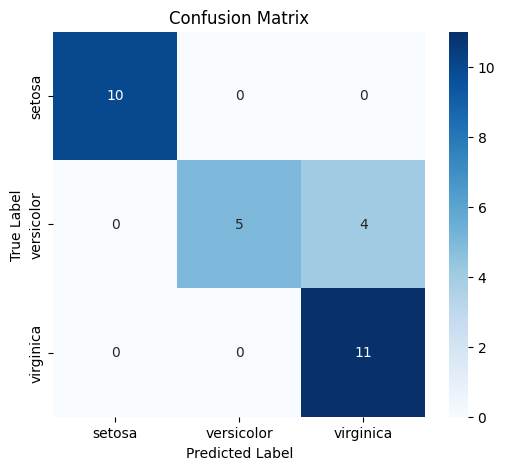

In [17]:
import seaborn as sns

# Step 1: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.show()
plt.close()

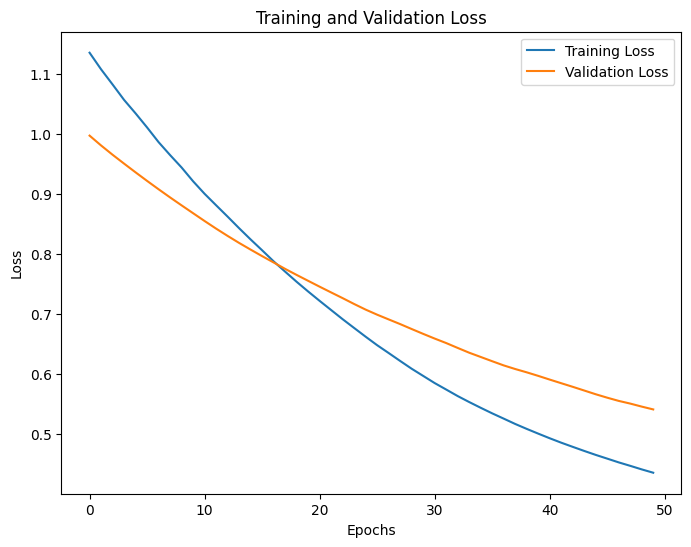

In [18]:
# Step 2: Loss Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
wandb.log({"loss_curve": wandb.Image(plt)})
plt.show()
plt.close()

In [19]:
for epoch, (train_loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
    wandb.log({
        "epoch": epoch + 1,
        "training_loss": train_loss,
        "validation_loss": val_loss
    })

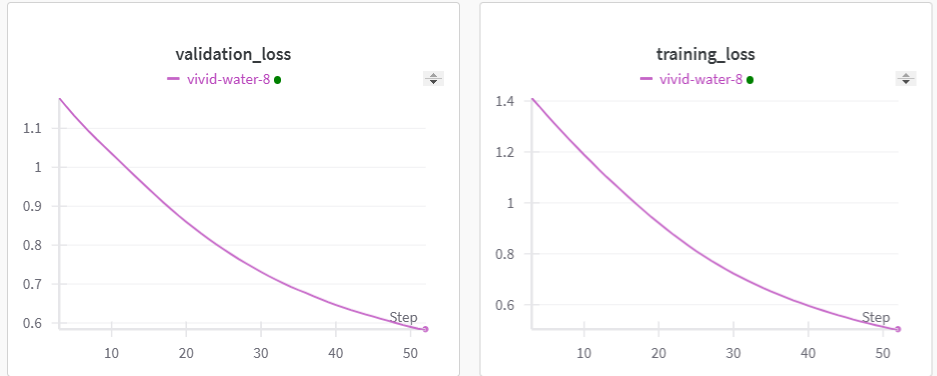

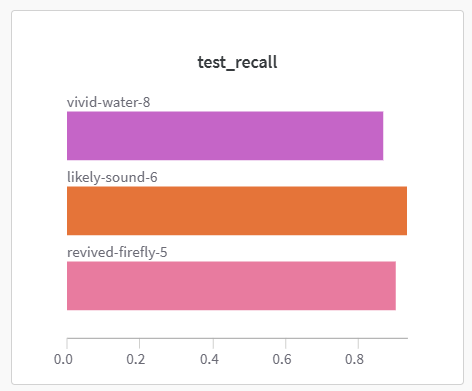

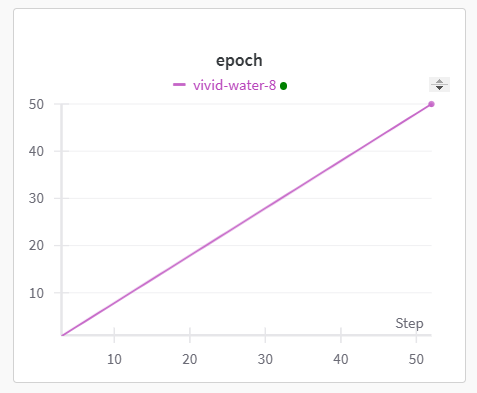

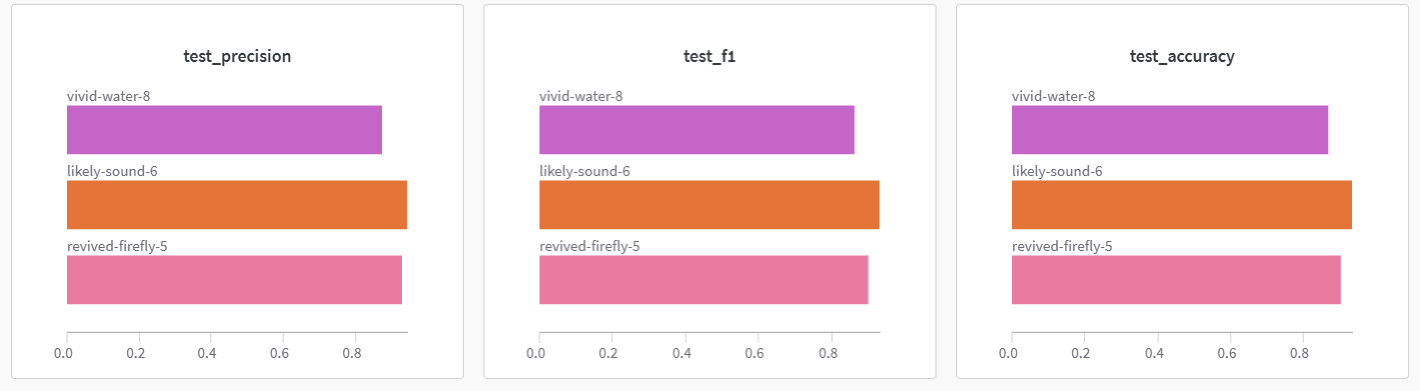

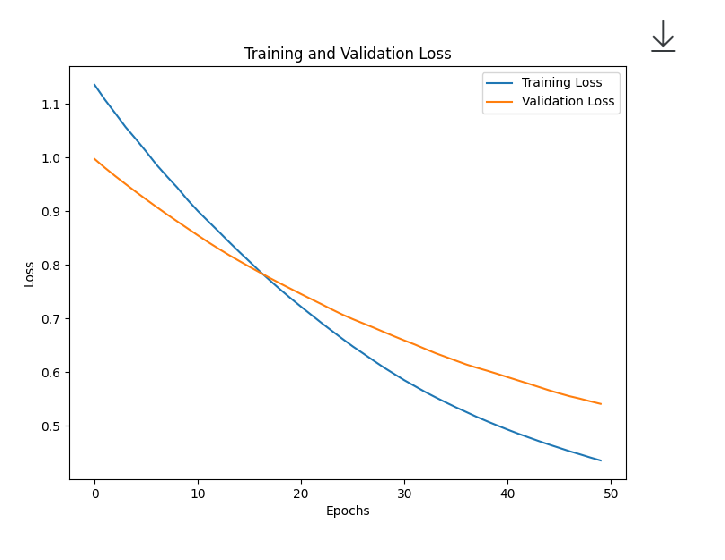

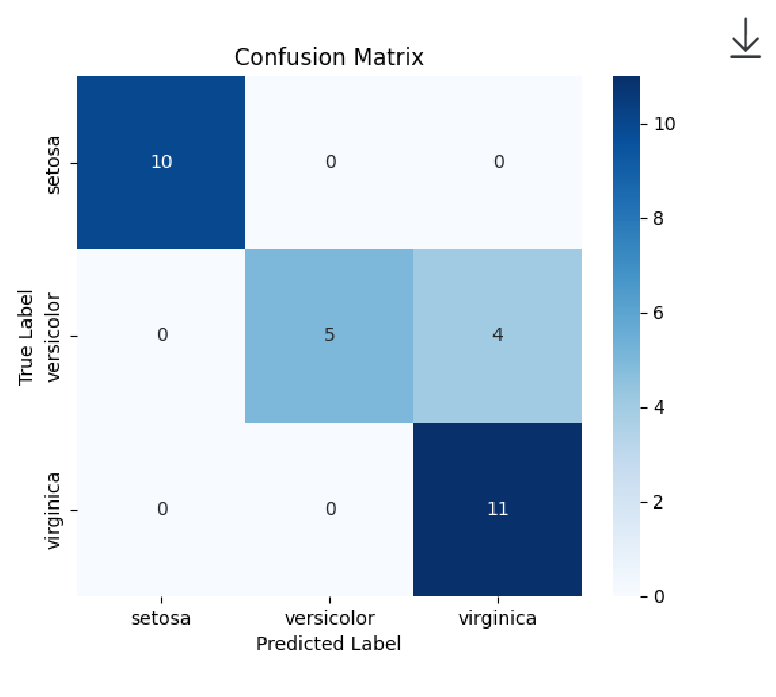

In [22]:
wandb.finish()

## Section 2: Hyperparameters
This section aims to perform a hyperparameter search to improve the performance of a custom model that distinguishes between any two classes (positive/negative or anything).


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
Batch: 2, LR: 0.001, Epochs: 1 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Batch: 2, LR: 0.001, Epochs: 3 -> Accuracy: 0.8667, F1-score: 0.8579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Batch: 2, LR: 0.001, Epochs: 5 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Batch: 2, LR: 1e-05, Epochs: 1 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Batch: 2, LR: 1e-05, Epochs: 3 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Batch: 2, LR: 1e-05, Epochs: 5 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Batch: 4, LR: 0.001, Epochs: 1 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Batch: 4, LR: 0.001, Epochs: 3 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Batch: 4, LR: 0.001, Epochs: 5 -> Accuracy: 0.9000, F1-score: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

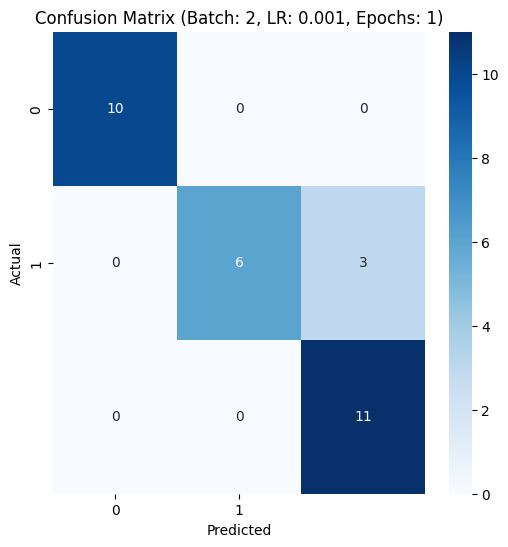


Sample Predictions:
Input: [ 2.2806171  -1.09622326  1.81317462  1.4879667 ]
True Label: 2, Predicted: 2

Input: [-0.25021365 -1.31843068  0.12488019 -0.08620462]
True Label: 1, Predicted: 1

Input: [ 0.3523651  -0.65180842  0.57509204  0.04497632]
True Label: 1, Predicted: 1

Input: [ 1.0754596  -0.20739359  0.85647444  1.4879667 ]
True Label: 2, Predicted: 2

Input: [0.8344281  0.23702125 0.80019796 1.09442387]
True Label: 2, Predicted: 2



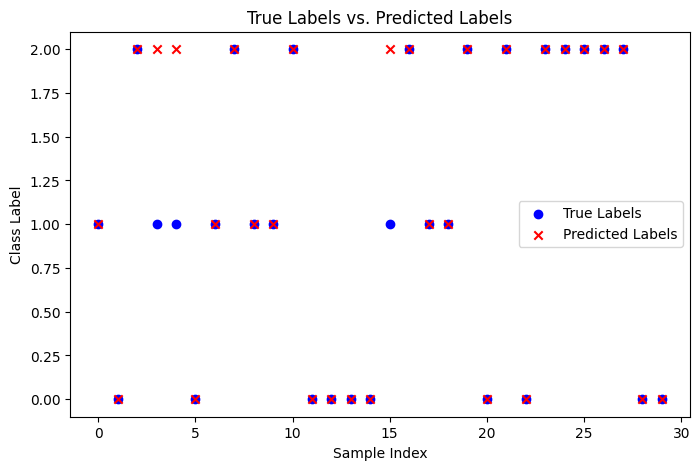

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Define the selected classes explicitly
selected_classes = [0, 1]  # We are doing binary classification (Setosa & Versicolor)

# Load the pre-trained model
model = load_model('model.h5')

# Hyperparameter search
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = {}

for batch_size, learning_rate, epochs in itertools.product(batch_sizes, learning_rates, epochs_list):

    # Compile model with new learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Fine-tune the pre-trained model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=0)

    # Evaluate on test set
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    key = f"Batch: {batch_size}, LR: {learning_rate}, Epochs: {epochs}"
    results[key] = (acc, f1, y_true, y_pred)
    print(f"{key} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

# Select best model based on accuracy
best_model_key = max(results, key=lambda k: results[k][0])
y_true_best, y_pred_best = results[best_model_key][2], results[best_model_key][3]

# Plot Confusion Matrix for the best model
cm = confusion_matrix(y_true_best, y_pred_best)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix ({best_model_key})')
plt.show()

# Show 5 sample test predictions
sample_indices = np.random.choice(len(y_test), 5, replace=False)

print("\nSample Predictions:")
for i in sample_indices:
    print(f"Input: {X_test[i]}")
    print(f"True Label: {y_true_best[i]}, Predicted: {y_pred_best[i]}\n")

# Plot true labels vs predicted labels for all test samples
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_true_best)), y_true_best, color='blue', label='True Labels', marker='o')
plt.scatter(range(len(y_pred_best)), y_pred_best, color='red', label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('True Labels vs. Predicted Labels')
plt.legend()
plt.show()


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
                  Method  Accuracy  F1-Score
0            Grid Search  0.566667  0.451732
1          Random Search  0.800000  0.771429
2              Hyperband  0.733333  0.716667
3  Bayesian Optimization  0.866667  0.863889
Best method: Bayesian Optimization


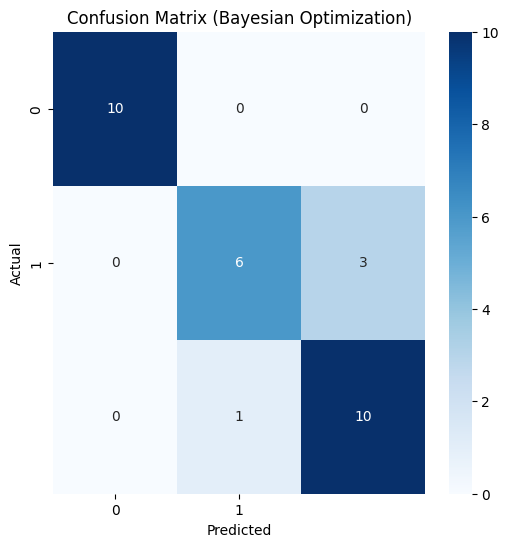


Sample Predictions:
Input: [-1.0938239   0.01481383 -1.22575535 -1.39801405]
True Label: 0, Predicted: 0

Input: [-0.1296979   1.57026575 -1.11320239 -1.13565217]
True Label: 0, Predicted: 0

Input: [-0.1296979  -0.65180842  0.46253908  0.17615727]
True Label: 1, Predicted: 1

Input: [0.5933966  0.45922866 0.57509204 0.5697001 ]
True Label: 1, Predicted: 2

Input: [ 1.19597535 -0.65180842  0.63136852  0.30733821]
True Label: 1, Predicted: 2



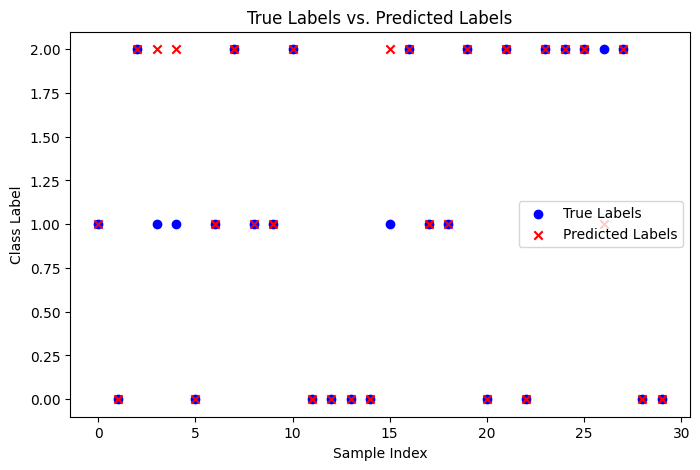

In [ ]:
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization


def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hp.Int('units', 8, 32, step=8), activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-5])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter search methods
search_methods = {
    "Grid Search": RandomSearch(build_model, objective='val_accuracy', max_trials=6, executions_per_trial=1),
    "Random Search": RandomSearch(build_model, objective='val_accuracy', max_trials=6, executions_per_trial=1),
    "Hyperband": Hyperband(build_model, objective='val_accuracy', max_epochs=5, factor=3, executions_per_trial=1),
    "Bayesian Optimization": BayesianOptimization(build_model, objective='val_accuracy', max_trials=6, executions_per_trial=1)
}

results = []

for method_name, tuner in search_methods.items():
    tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=4, verbose=0)
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    best_model = tuner.hypermodel.build(best_hps)
    best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=4, verbose=0)

    y_pred_probs = best_model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')

    results.append([method_name, acc, f1])

df_results = pd.DataFrame(results, columns=["Method", "Accuracy", "F1-Score"])
print(df_results)

# Plot Confusion Matrix for the best method
best_method = df_results.iloc[df_results['Accuracy'].idxmax()]['Method']
print(f"Best method: {best_method}")

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix ({best_method})')
plt.show()

# Show 5 sample test predictions
sample_indices = np.random.choice(len(y_test), 5, replace=False)
print("\nSample Predictions:")
for i in sample_indices:
    print(f"Input: {X_test[i]}")
    print(f"True Label: {y_true[i]}, Predicted: {y_pred[i]}\n")

# Plot True vs Predicted Labels
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_true)), y_true, color='blue', label='True Labels', marker='o')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('True Labels vs. Predicted Labels')
plt.legend()
plt.show()
